In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/noshowappointments/KaggleV2-May-2016.csv


# Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction 
> A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?

> **Questions**

* What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
    <ul>
<li><a href="#period"> Q1 relation with perioud between Scheduled Day and appoimtment</a></li>
<li><a href="#age"> Q2 with Age stages</a></li>
<li><a href="#var"> Q3 witn many factors like Types of diseases and get sms message</a></li>
</ul>
     

<a id='wrangling'></a>
## Data Wrangling
> Load data

>Assess Data(data types,null values)

In [3]:
df=pd.read_csv('../input/noshowappointments/KaggleV2-May-2016.csv') ## read data 
df.head() ## explor data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### General Properties

In [4]:
df.shape 

(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<h5 style="color:red;">there are not any null values</h5>
<h5 style="color:blue;">ScheduledDay and	AppointmentDay  their  data type are object  we should convert to date  </h5> 


In [4]:
df["ScheduledDay"]= pd.to_datetime(df["ScheduledDay"]) 
df["AppointmentDay"]= pd.to_datetime(df["AppointmentDay"])  # covert to date object
df["AppointmentDay"].dtypes,df["ScheduledDay"].dtypes #check data type

(datetime64[ns, UTC], datetime64[ns, UTC])

In [5]:
df['diff_days']=df["AppointmentDay"]-df["ScheduledDay"] # caculate the period between scheduled day and appointment day 
df['diff_days'].value_counts()

-1 days +16:50:06    25
-1 days +16:50:07    25
13 days 06:42:14     22
34 days 06:41:33     22
6 days 06:42:37      19
                     ..
40 days 09:53:54      1
-1 days +11:40:14     1
1 days 07:39:30       1
13 days 12:51:46      1
27 days 16:38:41      1
Name: diff_days, Length: 89712, dtype: int64

In [6]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,diff_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1 days 15:23:09
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:54:48
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:20:02
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,-1 days +15:57:44
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,1 days 11:11:35


<a id="eda"></a>
## Exploratory Data Analysis
> three Questions

<a id="period"></a>
## ََQ1
> **The effect of the length of the waiting period on attendance at the  scheduled appointment**

In [7]:
df_temp1=df[df.diff_days >= pd.to_timedelta(0)]
df_temp1  # remove minus period                #   df_temp1 to use in Q1

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,diff_days
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1 days 15:23:09
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:54:48
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:20:02
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,1 days 11:11:35
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,1 days 09:01:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,34 days 14:44:25
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,34 days 16:32:27
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,40 days 07:56:08
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,40 days 08:50:37


In [8]:
df_temp1['diff_days']=df_temp1['diff_days'].dt.days  # convert period to days

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df_temp1['diff_days'].unique()

array([  1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,  27,
        23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,  45,
        38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,  83,
        77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,  48,
        72,  63,  19,  32,  33,   5,  34,  35,  11,  12,  39,  46,   7,
         4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  53,  76,
        68,  82,  75,  88,  80, 102,  78,  67,  74,  84, 111,  79,  85,
        97,  93, 141, 154, 161, 168, 103, 132, 124,  95,  87,  89, 150,
       125, 126, 110, 118,  73,  70,  81, 107, 109, 101, 121, 100, 104,
        91,  96,  92, 106,  94, 138, 131, 178, 116, 145, 122])

UndefinedVariableError: name 'No' is not defined

In [36]:
df_temp2=df_temp1.groupby(['diff_days','No-show'])['PatientId'].count().reset_index()


UndefinedVariableError: name 'No' is not defined

Text(0, 0.5, 'Number of Patient')

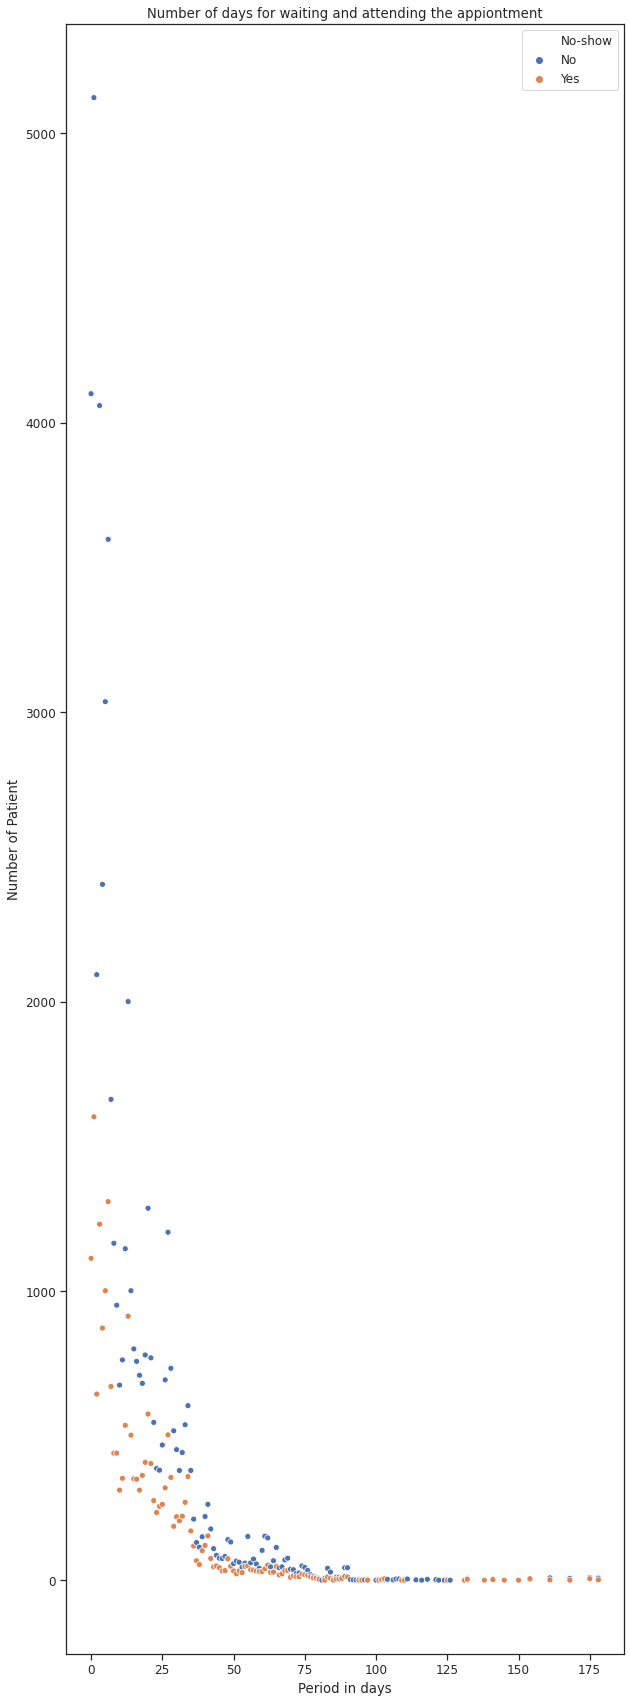

In [42]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
f, ax = plt.subplots(figsize=(10, 30))
df_temp2=df_temp1.groupby(['diff_days','No-show'])['PatientId'].count().reset_index()

ax = sns.scatterplot(x="diff_days",y="PatientId", hue="No-show", data=df_temp2)
plt.title('Number of days for waiting and attending the appiontment')

# Set x-axis label
plt.xlabel('Period in days')

# Set y-axis label
plt.ylabel('Number of Patient')

> <h2 style="color:red;"> Long waiting(more than 125 days) times The number of patients is few and absent from the appointment is > greater than attendance</h2>
    
> <h2 style="color:red;">The average periods(from 75 to 125) are almost equal, with few patients </h2>
    
> <h2 style="color:red;">In small periods, attendance increases with a large number of patients </h2>
    

Text(0, 0.5, 'Number of Patient')

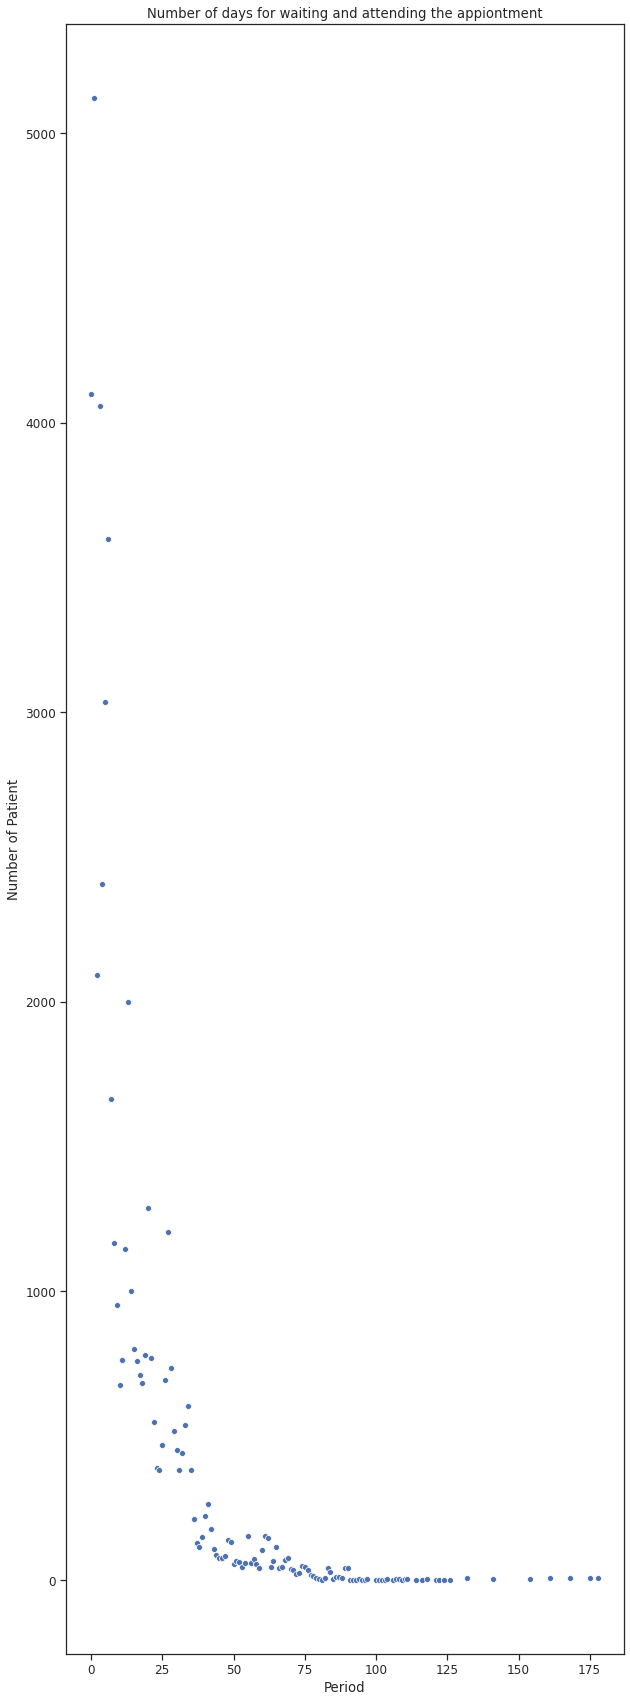

In [41]:
df_temp3=df_temp2[(df_temp2['No-show']=='No')]   # for just who attend
f, ax = plt.subplots(figsize=(10, 30))
ax = sns.scatterplot(x="diff_days",y="PatientId", data=df_temp3)
plt.title('Number of days for waiting and attending the appiontment')

# Set x-axis label
plt.xlabel('Period')

# Set y-axis label
plt.ylabel('Number of Patient')

Text(0.5, 0, 'Period')

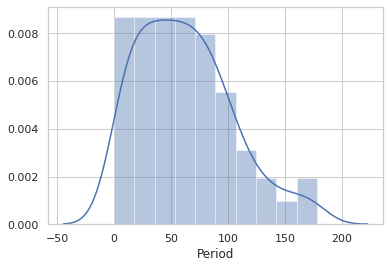

In [47]:
sns.distplot(df_temp2['diff_days']);
plt.xlabel('Period')


<h5 style="color:red"> Most waiting times are less than 60 days </h5>

<a id="age"></a>
### **Q2 relation between Attend on time and age stage**

In [ ]:
df.age.value_counts()

In [48]:
def age_stage(x):                              # Divide the age into stages
    if ((x>0 ) and (x<16)): x= "Child"
    elif((x>=16) and (x<30)): x="age from 16 to 29"
    elif((x>=30) and (x<40)): x="age from 30 to 39"
    elif((x>=40) and (x<50)): x="age from 40 to 49"
    elif((x>=50) and (x<60)): x="age from 50 to 59"
    elif((x>=60) and (x<70)): x="age from 60 to 69"
    elif((x>=70) and (x<80)): x="age from 70 to 79"    
    else: x="age from 79 to 100"
    return x;
        
df['age_stage']=df['Age'].apply(lambda x : age_stage(x))
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,diff_days,age_stage
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52,age from 60 to 69
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33,age from 50 to 59
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56,age from 60 to 69
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29,Child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37,age from 50 to 59


In [49]:
df_temp4=df.groupby(['age_stage','No-show'])['PatientId'].count().reset_index()  #df_temp4 for Q2
df_temp4.head()

,age_stage,No-show,PatientId
0,Child,No,16320
1,Child,Yes,4609
2,age from 16 to 29,No,14769
3,age from 16 to 29,Yes,4873
4,age from 30 to 39,No,11871


Text(0, 0.5, 'Number of Patient')

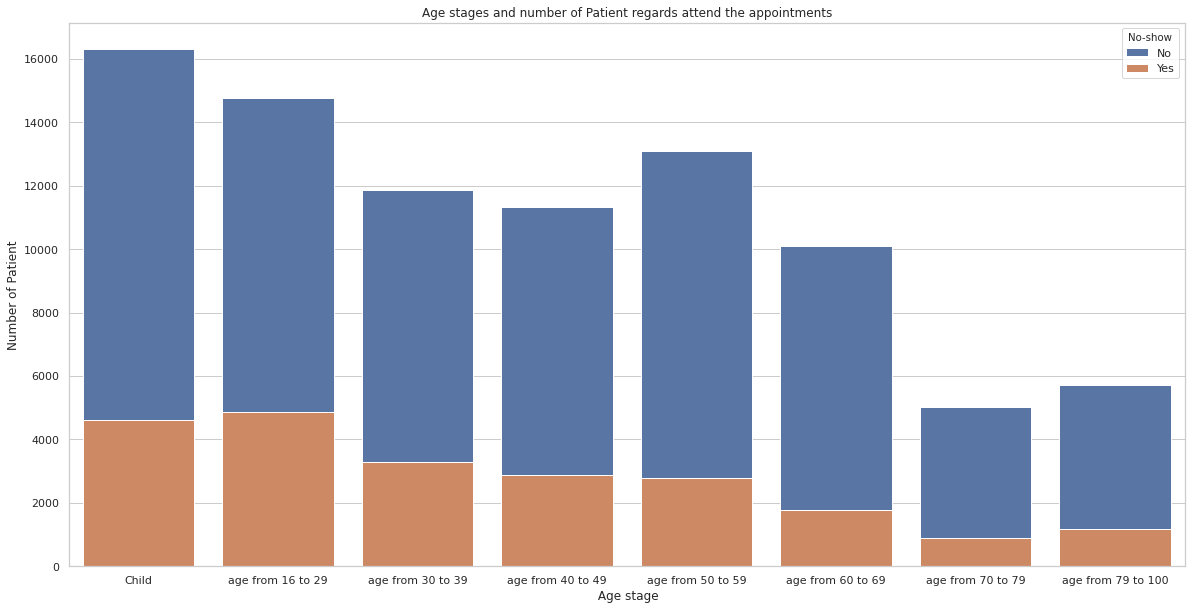

In [51]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x="age_stage", y="PatientId", hue="No-show",ax=ax,data=df_temp4,dodge=False);
plt.title('Age stages and number of Patient regards attend the appointments')

# Set x-axis label
plt.xlabel(' Age stage')

# Set y-axis label
plt.ylabel('Number of Patient')

<h4 style="color:red"> there is not relation between age stage and attending Doctor appiontment Attendance and absenteeism ratios are approximately equal</h4>

<a id="var"></a>
### Q3  Effect of several factors on attending doctor's appointments

In [8]:
df_temp5=df.groupby('No-show',as_index=False)['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received'].sum()# for Q3

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [5]:
df_temp5.head()

,No-show,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,No,8283,18029,6513,2683,2006,25698
1,Yes,2578,3772,1430,677,453,9784


In [9]:
df_temp=df_temp5.T.reset_index()          # make the coulmns as rows to compare between many variables 
df_temp.columns=['index','No','Yes']

df_temp

,index,No,Yes
0,No-show,No,Yes
1,Scholarship,8283,2578
2,Hipertension,18029,3772
3,Diabetes,6513,1430
4,Alcoholism,2683,677
5,Handcap,2006,453
6,SMS_received,25698,9784


In [11]:
df_temp.drop(index=0,inplace=True) # remove No-show row
df_temp.head()

KeyError: '[0] not found in axis'

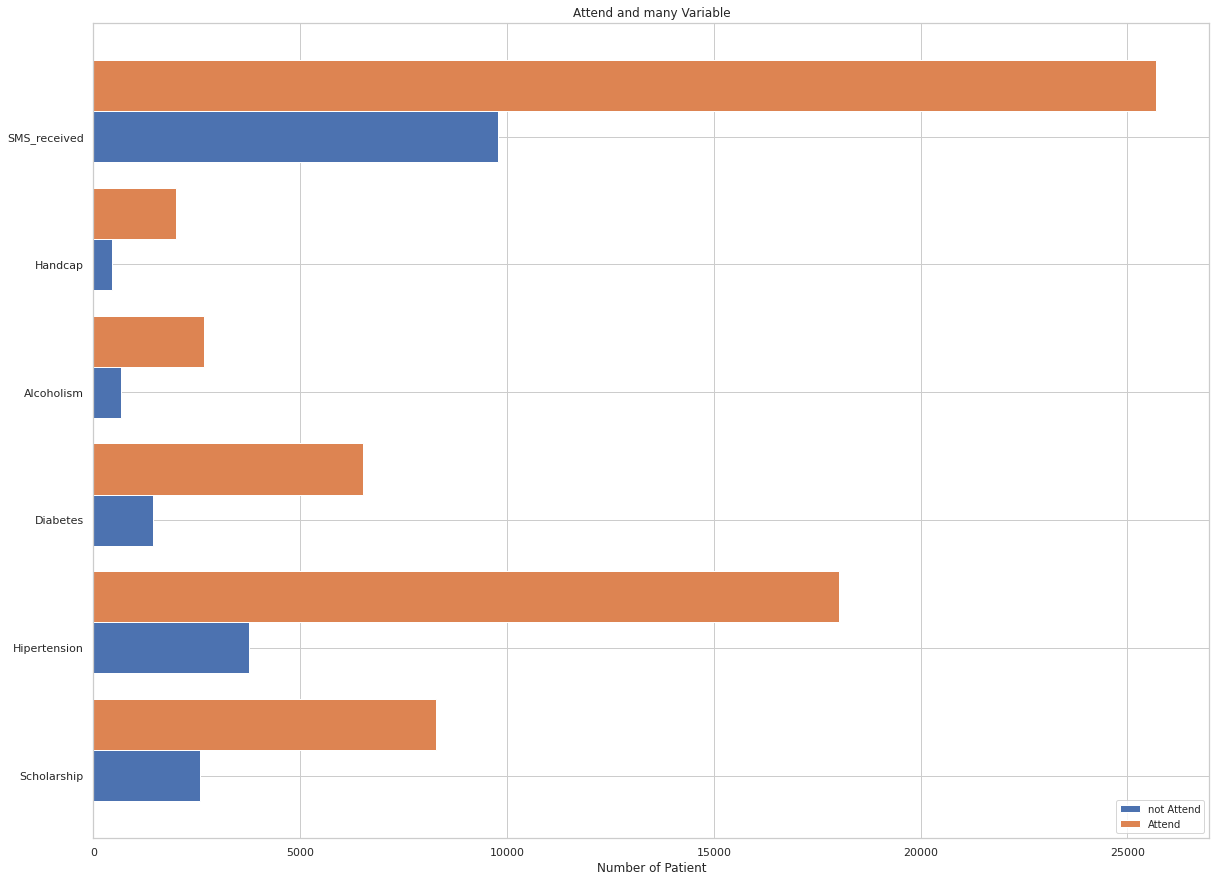

In [12]:

f, ax = plt.subplots(figsize=(20, 15))
labels=df_temp['index'].values
Y=df_temp['Yes'].values
X=np.arange(len(labels))
width=0.4

Yes=ax.barh(X,Y,width,label='not Attend')

######
Y=df_temp['No'].values
No=ax.barh((X+width),Y,width,label='Attend')



ax.set_xlabel('Number of Patient')
ax.set_title('Attend and many Variable')
ax.set_yticks(X)
ax.set_yticklabels(labels)
ax.legend(loc='best', fontsize=10)



<h5 style="color:red;"> there are no relation between all these Variables and attend the  absenteeism ratios are approximately equal</h5>

<a id="conclusions"></a>
### Conclusions
* All variables i tested i did not find any correlation between them and no_show except for long period of waiting and this represent small number of Patients *